**Loss Function In ANN**

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use("fivethirtyeight")

MAE Loss

In [2]:
def MAE(actual,pred):

  return np.abs(actual-pred)


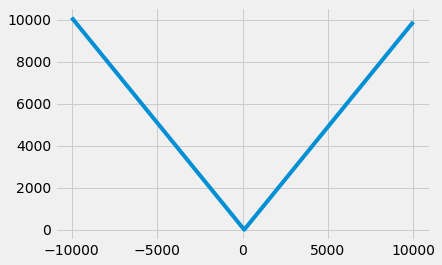

In [5]:
actual_arr = np.repeat(100,10000)
pred_arr = np.arange(-10000,10000,2)
loss_mae = [MAE(actual,pred) for actual,pred in zip(actual_arr,pred_arr)]
plt.plot(pred_arr,loss_mae)

In [6]:
total_loss = np.mean(np.sum(loss_mae))
total_loss

50005100.0

MSE Loss

In [7]:
def MSE(actual,pred):
  return np.square(actual-pred)

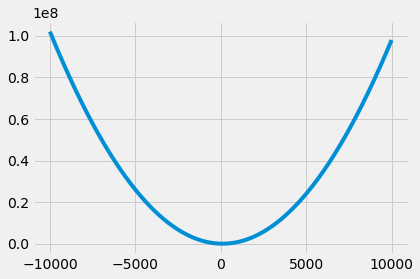

In [8]:
actual_arr = np.repeat(100,10000)
pred_arr = np.arange(-10000,10000,2)

loss_mse = [MSE(actual,pred)for actual,pred in zip(actual_arr,pred_arr)]

plt.plot(pred_arr,loss_mse)

In [10]:
total_loss = np.mean(np.sum(loss_mse))
total_loss

333435340000.0

## **Hubber loss**

Huber loss is often used in regression problem.Compared with the L2 Loss , Hubber loss is less sensative to outlies because if the residual is too large , it is a piecewise function, loss is a linear function of the residual.

In [12]:
def huber(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return loss

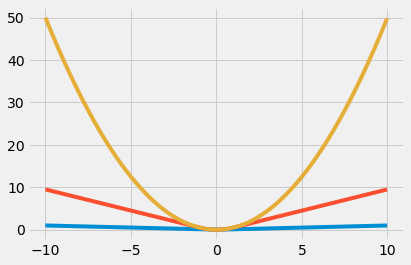

In [13]:
actual_arr = np.repeat(0, 1000)
pred_arr = np.arange(-10, 10, 0.02)

deltas = [0.1, 1, 10]

loss_huber = [[huber(actual, pred, delta) for actual, pred in zip(actual_arr, pred_arr)] for delta in deltas]

for idx in range(len(deltas)):
  plt.plot(pred_arr, loss_huber[idx])

# **Pseudo Huber Loss**
The Pseudo Huber loss function can be used as a smooth approximation of the 
hubber loss function.

It combine the best properties of L2 square loss and L1 absolute loss by being strogly convex when close to the target /minimum and less steep for the extreme values.

The scale at which the Pseudo-Huber loss function transition from L2 loss for values closes to the minimum to L1 loss for extreme values and the steepness at extreme values can be controlled by the delta value.

The Pseudo-Huber loss function ensure that the derivation are continiouds for all degree.

In [16]:
x_function = tf.linspace(-1.,1.,500)
target = tf.constant(0.)

delta1 = tf.constant(0.2)
pseudo_huber1_output = tf.multiply(tf.square(delta1),tf.sqrt(1.+tf.square((target-x_function)/delta1))- 1.)

delta2 = tf.constant(1.)
pseudo_huber2_output = tf.multiply(tf.square(delta2),tf.sqrt(1.+tf.square((target-x_function)/delta2))- 1.)

delta3 = tf.constant(5.)
pseudo_huber3_output = tf.multiply(tf.square(delta3),tf.sqrt(1.+tf.square((target-x_function)/delta3))- 1.)

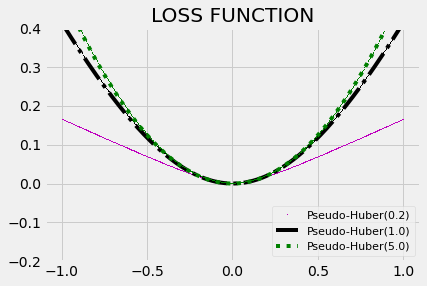

In [18]:
x_array = x_function
plt.plot(x_array,pseudo_huber1_output,'m,',label='Pseudo-Huber(0.2)')
plt.plot(x_array,pseudo_huber2_output,'k-.,',label='Pseudo-Huber(1.0)')
plt.plot(x_array,pseudo_huber3_output,'g:,',label='Pseudo-Huber(5.0)')
plt.ylim(-0.2,0.4)
plt.legend(loc="lower right",prop={'size':11})
plt.title("LOSS FUNCTION")
plt.show()

# **Hinge Loss**

Hinge Loss is often used for the binary classification probelm , such as ground true :t =1 or -1 ,
and the  predicted value y = wx+b

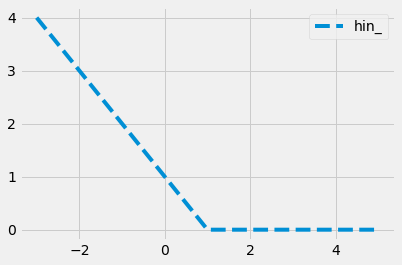

In [19]:
x_guess2 = tf.linspace(-3.,5.,500)
x_actual2 = tf.convert_to_tensor([1.]*500)

#Hinge loss
#hinge_loss = tf.losses.hinge_loss(labels=x_actual2, logits=x_guess2)
hinge_loss = tf.maximum(0.,1.-(x_guess2*x_actual2))
# with tf.Session() as sess:
x_,hin_ = [x_guess2, hinge_loss]
plt.plot(x_,hin_,'--', label='hin_')
plt.legend()
plt.show()